In [1]:
import pathlib
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten, Dropout

# Validation set of real images

## Real Image dataset

In [4]:
Dataset_Folder = 'Dataset_4_classes-split/' #_partial'
data_dir_train = pathlib.Path(Dataset_Folder + 'train' )
data_dir_val = pathlib.Path(Dataset_Folder + 'test' )
# data_dir_train = pathlib.Path('Dataset_4_classes')

In [5]:
len(list(data_dir_train.glob('*/*.JPG')))

3672

In [3]:
batch_size = 32
img_height = 256
img_width = 256

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder+'train', #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = None, #0.2,
#             subset="training",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 3672 files belonging to 4 classes.


2022-11-24 06:53:22.619226: I tensorflow/core/platform/cpu_feature_guard.cc:152] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 06:53:23.894724: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38031 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder+'test', #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = None, #0.2,
#             subset="validation",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 919 files belonging to 4 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


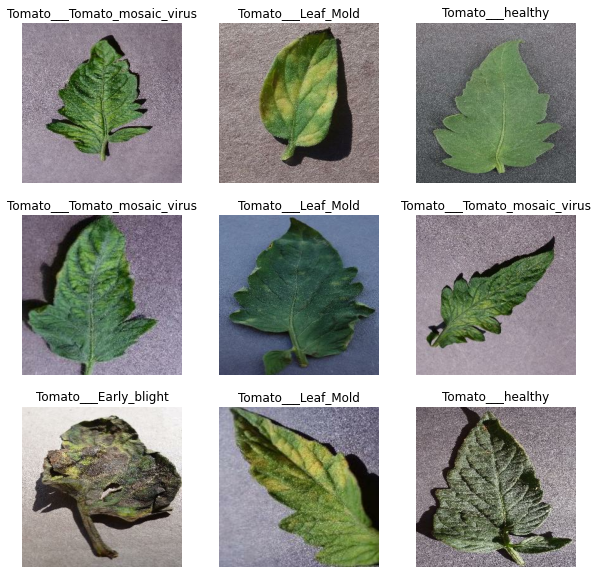

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [4]:
#number of classes.
num_classes = 4
#Sequential layers with normalized values 
model = Sequential(
        [layers.experimental.preprocessing.Rescaling(1./255, 
         input_shape=(img_height, img_width, 3))])
#first convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
#second convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten layer
model.add(Flatten())
#Fully connected layer
model.add(Dense(128,activation = 'relu'))
#Softmax layer
model.add(Dense(num_classes, activation = 'softmax' ))

2022-11-29 10:37:43.127759: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-11-29 10:37:43.127832: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: hal9000
2022-11-29 10:37:43.127849: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: hal9000
2022-11-29 10:37:43.128100: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 495.29.5
2022-11-29 10:37:43.128148: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 495.29.5
2022-11-29 10:37:43.128163: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 495.29.5
2022-11-29 10:37:43.128927: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical oper

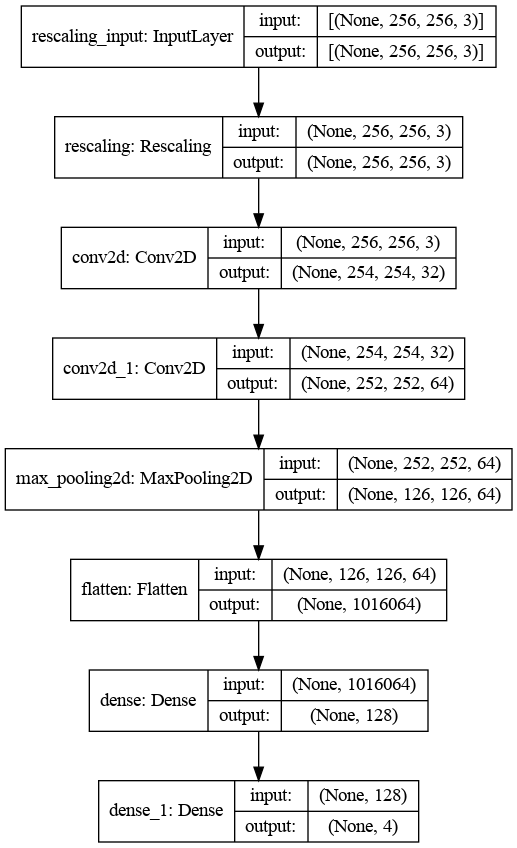

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='CNN.png', show_shapes=True, show_layer_names=True)

In [43]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(), #from_logits=True),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1016064)           0         
                                                                 
 dense_6 (Dense)             (None, 128)               130056320 
                                                      

In [20]:
epochs = 20

In [21]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
115/115 [==============================] - 4s 31ms/step - loss: 3.1299 - accuracy: 0.5656 - val_loss: 0.4982 - val_accuracy: 0.8183
Epoch 2/20
115/115 [==============================] - 3s 30ms/step - loss: 0.3498 - accuracy: 0.8821 - val_loss: 0.4509 - val_accuracy: 0.8498
Epoch 3/20
115/115 [==============================] - 3s 30ms/step - loss: 0.2060 - accuracy: 0.9330 - val_loss: 0.3613 - val_accuracy: 0.8803
Epoch 4/20
115/115 [==============================] - 3s 29ms/step - loss: 0.1079 - accuracy: 0.9703 - val_loss: 0.2928 - val_accuracy: 0.8977
Epoch 5/20
115/115 [==============================] - 3s 29ms/step - loss: 0.0374 - accuracy: 0.9905 - val_loss: 0.4251 - val_accuracy: 0.8770
Epoch 6/20
115/115 [==============================] - 3s 29ms/step - loss: 0.0240 - accuracy: 0.9940 - val_loss: 0.3740 - val_accuracy: 0.9021
Epoch 7/20
115/115 [==============================] - 3s 29ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.3384 - val_accuracy: 0.9260

In [22]:
# model.save('tomato_leaf_classifier_4_class_20_epochs.h5')

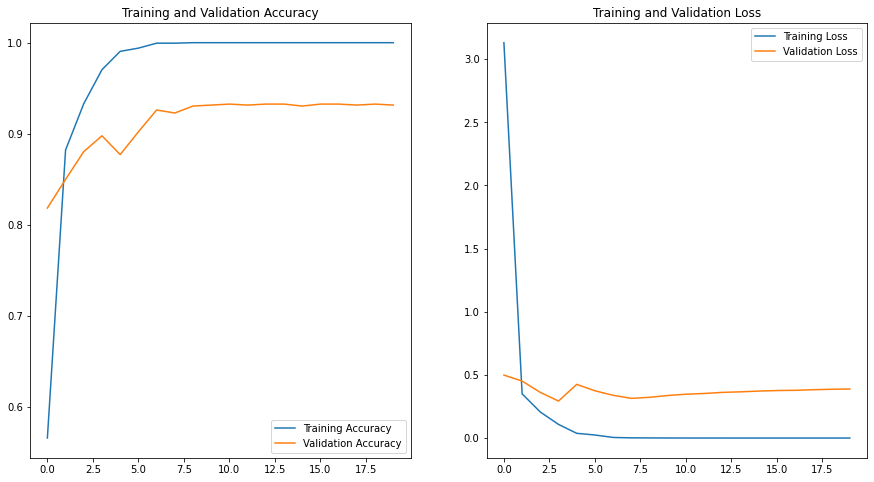

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Merged dataset

In [24]:
Dataset_Folder = 'Merged_dataset1'

In [33]:
train_ds_merged = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder, #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = None, #0.01,
#             subset="training",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 7677 files belonging to 4 classes.


In [34]:
train_ds_merged = train_ds_merged.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [35]:
history = model.fit(
  train_ds_merged,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
240/240 [==============================] - 9s 29ms/step - loss: 2.1473 - accuracy: 0.7739 - val_loss: 0.3578 - val_accuracy: 0.8781
Epoch 2/20
240/240 [==============================] - 7s 28ms/step - loss: 0.1112 - accuracy: 0.9643 - val_loss: 0.1943 - val_accuracy: 0.9391
Epoch 3/20
240/240 [==============================] - 7s 28ms/step - loss: 0.0430 - accuracy: 0.9884 - val_loss: 0.3922 - val_accuracy: 0.8629
Epoch 4/20
240/240 [==============================] - 7s 28ms/step - loss: 0.0481 - accuracy: 0.9859 - val_loss: 0.2819 - val_accuracy: 0.9260
Epoch 5/20
240/240 [==============================] - 7s 28ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.3603 - val_accuracy: 0.9260
Epoch 6/20
240/240 [==============================] - 7s 28ms/step - loss: 0.0228 - accuracy: 0.9913 - val_loss: 0.2812 - val_accuracy: 0.9358
Epoch 7/20
240/240 [==============================] - 7s 28ms/step - loss: 9.9081e-04 - accuracy: 0.9999 - val_loss: 0.3667 - val_accuracy: 0.

In [36]:
# model.save('tomato_leaf_classifier_4_class_20_epochs_merged.h5')

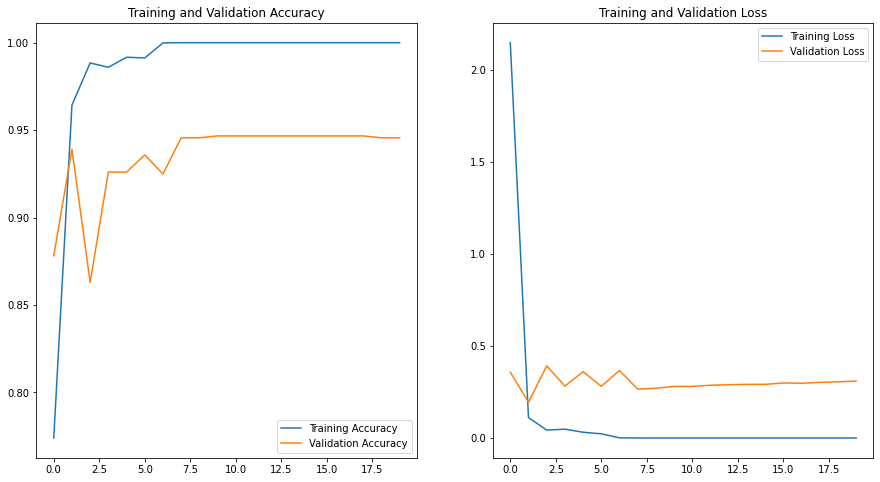

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Generated dataset

In [38]:
Dataset_Folder = 'Generated Images'

In [39]:
train_ds_generated = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder, #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = None, #0.01,
#             subset="training",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 4001 files belonging to 4 classes.


In [40]:
train_ds_generated = train_ds_generated.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [45]:
history = model.fit(
  train_ds_generated,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
126/126 [==============================] - 4s 33ms/step - loss: 2.3525 - accuracy: 0.8038 - val_loss: 4.1836 - val_accuracy: 0.6812
Epoch 2/20
126/126 [==============================] - 4s 29ms/step - loss: 0.0230 - accuracy: 0.9935 - val_loss: 4.6209 - val_accuracy: 0.6464
Epoch 3/20
126/126 [==============================] - 4s 29ms/step - loss: 7.7212e-04 - accuracy: 1.0000 - val_loss: 4.2777 - val_accuracy: 0.6888
Epoch 4/20
126/126 [==============================] - 4s 29ms/step - loss: 1.8667e-04 - accuracy: 1.0000 - val_loss: 4.0647 - val_accuracy: 0.6964
Epoch 5/20
126/126 [==============================] - 4s 29ms/step - loss: 8.4236e-05 - accuracy: 1.0000 - val_loss: 4.2385 - val_accuracy: 0.6997
Epoch 6/20
126/126 [==============================] - 4s 29ms/step - loss: 5.0930e-05 - accuracy: 1.0000 - val_loss: 4.4120 - val_accuracy: 0.6942
Epoch 7/20
126/126 [==============================] - 4s 29ms/step - loss: 3.6892e-05 - accuracy: 1.0000 - val_loss: 4.4156 - 

In [46]:
# model.save('tomato_leaf_classifier_4_class_20_epochs_generated.h5')

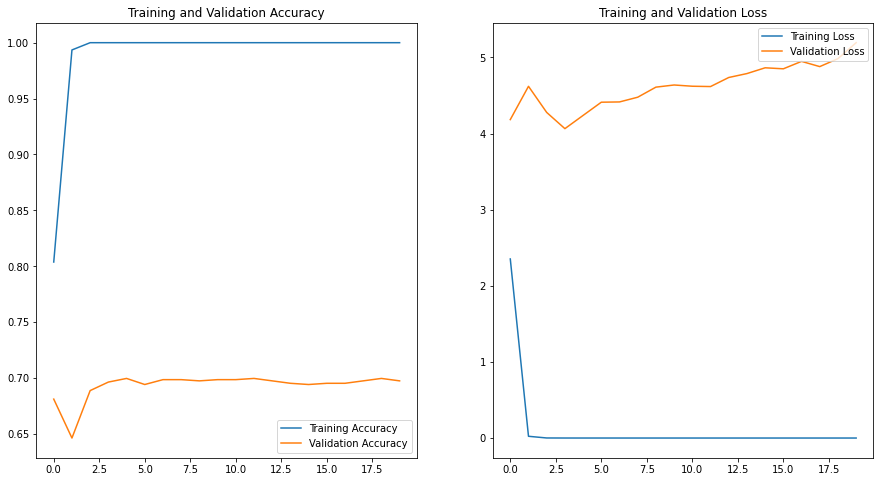

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Train-Val Split

## Real Image dataset

In [48]:
Dataset_Folder = 'Dataset_4_classes/' #_partial'
data_dir_train = pathlib.Path(Dataset_Folder)
# data_dir_train = pathlib.Path('Dataset_4_classes')

In [49]:
len(list(data_dir_train.glob('*/*.JPG')))

4590

In [50]:
batch_size = 32
img_height = 256
img_width = 256

In [51]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder, #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = 0.2,
            subset="training",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 4592 files belonging to 4 classes.
Using 3674 files for training.


In [52]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder, #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = 0.2,
            subset="validation",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 4592 files belonging to 4 classes.
Using 918 files for validation.


In [53]:
class_names = train_ds.class_names
print(class_names)

['Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


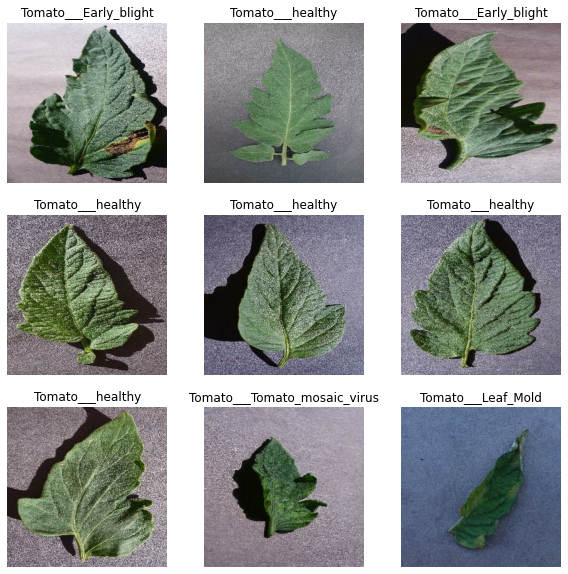

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [55]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [82]:
#number of classes.
num_classes = 4
#Sequential layers with normalized values 
model = Sequential(
        [layers.experimental.preprocessing.Rescaling(1./255, 
         input_shape=(img_height, img_width, 3))])
#first convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
#second convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten layer
model.add(Flatten())
#Fully connected layer
model.add(Dense(128,activation = 'relu'))
#Softmax layer
model.add(Dense(num_classes, activation = 'softmax' ))

In [83]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 1016064)           0         
                                                                 
 dense_14 (Dense)            (None, 128)               130056320 
                                                      

In [59]:
epochs = 20

In [60]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
115/115 [==============================] - 5s 33ms/step - loss: 2.3299 - accuracy: 0.6709 - val_loss: 0.5167 - val_accuracy: 0.8279
Epoch 2/20
115/115 [==============================] - 4s 31ms/step - loss: 0.3073 - accuracy: 0.8925 - val_loss: 0.4289 - val_accuracy: 0.8595
Epoch 3/20
115/115 [==============================] - 3s 30ms/step - loss: 0.0987 - accuracy: 0.9660 - val_loss: 0.2955 - val_accuracy: 0.9063
Epoch 4/20
115/115 [==============================] - 3s 30ms/step - loss: 0.0733 - accuracy: 0.9755 - val_loss: 0.3870 - val_accuracy: 0.8987
Epoch 5/20
115/115 [==============================] - 3s 29ms/step - loss: 0.0384 - accuracy: 0.9897 - val_loss: 0.3659 - val_accuracy: 0.9118
Epoch 6/20
115/115 [==============================] - 3s 29ms/step - loss: 0.0100 - accuracy: 0.9976 - val_loss: 0.3346 - val_accuracy: 0.9281
Epoch 7/20
115/115 [==============================] - 3s 30ms/step - loss: 4.5960e-04 - accuracy: 1.0000 - val_loss: 0.3291 - val_accuracy: 0.

In [61]:
# model.save('tomato_leaf_classifier_4_class_20_epochs_diff_val.h5')

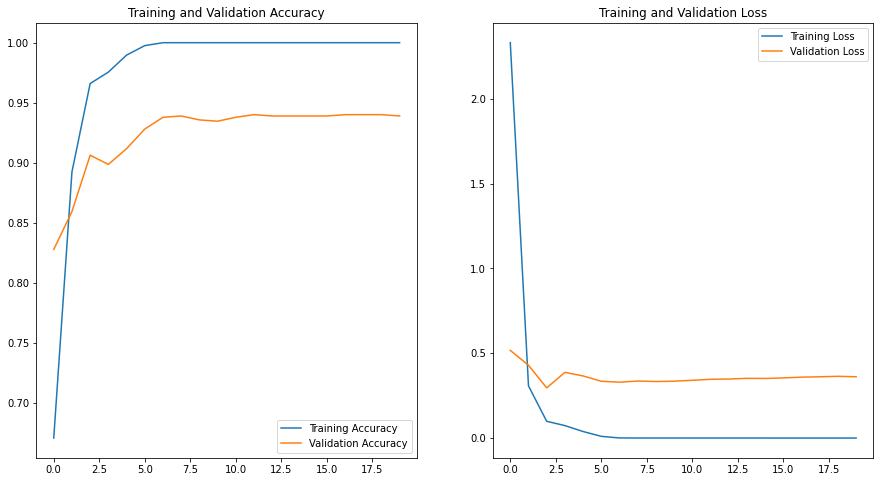

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Merged dataset

In [63]:
Dataset_Folder = 'Merged_dataset2'

In [64]:
train_ds_merged = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder, #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = 0.2,
            subset="training",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 8594 files belonging to 4 classes.
Using 6876 files for training.


In [65]:
val_ds_merged = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder, #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = 0.2,
            subset="validation",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 8594 files belonging to 4 classes.
Using 1718 files for validation.


In [66]:
train_ds_merged = train_ds_merged.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_merged = val_ds_merged.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [70]:
history = model.fit(
  train_ds_merged,
  validation_data=val_ds_merged,
  epochs=epochs
)

Epoch 1/20
215/215 [==============================] - 9s 33ms/step - loss: 1.4182 - accuracy: 0.8377 - val_loss: 0.1077 - val_accuracy: 0.9639
Epoch 2/20
215/215 [==============================] - 6s 30ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.1000 - val_accuracy: 0.9738
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.0419 - accuracy: 0.9865 - val_loss: 0.0933 - val_accuracy: 0.9738
Epoch 4/20
215/215 [==============================] - 7s 30ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.2328 - val_accuracy: 0.9237
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.0972 - accuracy: 0.9655 - val_loss: 0.2954 - val_accuracy: 0.9290
Epoch 6/20
215/215 [==============================] - 7s 30ms/step - loss: 0.0143 - accuracy: 0.9959 - val_loss: 0.0584 - val_accuracy: 0.9866
Epoch 7/20
215/215 [==============================] - 6s 30ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0802 - val_accuracy: 0.9843

In [71]:
# model.save('tomato_leaf_classifier_4_class_20_epochs_merged_diff_val.h5')

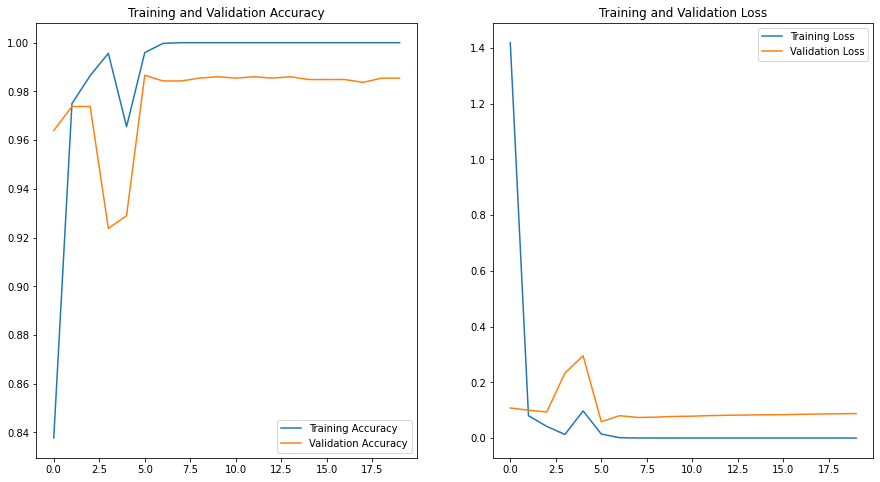

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Generated dataset

In [73]:
Dataset_Folder = 'Generated Images'

In [74]:
train_ds_generated = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder, #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = 0.2,
            subset="training",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 4001 files belonging to 4 classes.
Using 3201 files for training.


In [75]:
val_ds_generated = tf.keras.preprocessing.image_dataset_from_directory(
            Dataset_Folder, #"Dataset_4_classes_partial",
            labels = 'inferred',
            validation_split = 0.2,
            subset="validation",
            seed = 123,
            image_size = (img_height,img_width),
            batch_size = batch_size)

Found 4001 files belonging to 4 classes.
Using 800 files for validation.


In [76]:
train_ds_generated = train_ds_generated.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_generated = val_ds_generated.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [85]:
history = model.fit(
  train_ds_generated,
  validation_data=val_ds_generated,
  epochs=epochs
)

Epoch 1/20
101/101 [==============================] - 3s 31ms/step - loss: 1.2772 - accuracy: 0.7660 - val_loss: 0.1178 - val_accuracy: 0.9638
Epoch 2/20
101/101 [==============================] - 3s 30ms/step - loss: 0.0235 - accuracy: 0.9934 - val_loss: 0.0217 - val_accuracy: 0.9925
Epoch 3/20
101/101 [==============================] - 3s 31ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.1001 - val_accuracy: 0.9675
Epoch 4/20
101/101 [==============================] - 3s 31ms/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 0.0401 - val_accuracy: 0.9862
Epoch 5/20
101/101 [==============================] - 3s 30ms/step - loss: 0.0146 - accuracy: 0.9963 - val_loss: 0.0077 - val_accuracy: 0.9975
Epoch 6/20
101/101 [==============================] - 3s 29ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.0077 - val_accuracy: 0.9962
Epoch 7/20
101/101 [==============================] - 3s 29ms/step - loss: 7.2602e-05 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.

In [86]:
# model.save('tomato_leaf_classifier_4_class_20_epochs_generated_diff_val.h5')

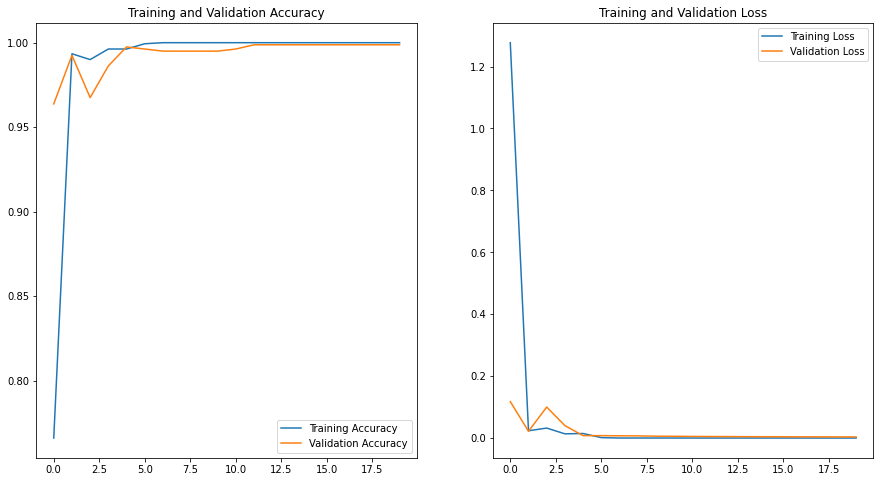

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()